In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat('/content/drive/MyDrive/face.mat')

mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [ ]:
face_data = mat_content['X']

print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)


In [ ]:
face_identity = mat_content['l']

print(face_identity)
print(face_identity.shape)

[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
  27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
  29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
  32 32 32 32 32 32 32 32 33 33 33 33 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_data.T, face_identity.T, test_size=0.2, random_state=42)

print(X_train.shape)

(416, 2576)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

In [ ]:
# Define the number of base models and randomness parameters
randomness_params_space = [x / 100.0 for x in range(50, 101, 5)]
randomness_params_bagging = [x / 100.0 for x in range(50, 101, 5)]

ensemble_accuracy = []

for param_space in randomness_params_space:
  ensemble_accuracy_space = []

  # Randomly select a subset of features from the dataset
  random_features = random.sample(range(X_train.shape[1]), int(param_space * X_train.shape[1]))
  X_randomized = X_train[:, random_features]

  for param_bagging in randomness_params_bagging:
    # Apply PCA to further reduce dimensionality if needed
    pca = PCA(n_components=160)  # You can adjust the explained variance ratio
    X_pca = pca.fit_transform(X_randomized)

    # Randomly select a subset of samples using bagging
    bagging_classifier = BaggingClassifier(estimator=LinearDiscriminantAnalysis(),
                                          n_estimators=36, max_samples=param_bagging)
    bagging_classifier.fit(X_pca, y_train.ravel())

    # Apply the ensemble model to the test set
    X_test_randomized = X_test[:, random_features]
    X_test_pca = pca.transform(X_test_randomized)
    y_pred = bagging_classifier.predict(X_test_pca)

    # Calculate accuracy of the base model
    accuracy = accuracy_score(y_test, y_pred.ravel())

    # Calculate the ensemble accuracy for this randomness parameter
    ensemble_accuracy_space.append(accuracy)

    print("Accuracy for param_space: {} param_bagging: {}:".format(param_space, param_bagging), accuracy)

  ensemble_accuracy.append(ensemble_accuracy_space)

Accuracy for param_space: 0.5 param_bagging: 0.5: 0.6923076923076923
Accuracy for param_space: 0.5 param_bagging: 0.55: 0.7211538461538461
Accuracy for param_space: 0.5 param_bagging: 0.6: 0.7692307692307693
Accuracy for param_space: 0.5 param_bagging: 0.65: 0.7692307692307693
Accuracy for param_space: 0.5 param_bagging: 0.7: 0.6346153846153846
Accuracy for param_space: 0.5 param_bagging: 0.75: 0.75
Accuracy for param_space: 0.5 param_bagging: 0.8: 0.8269230769230769
Accuracy for param_space: 0.5 param_bagging: 0.85: 0.8365384615384616
Accuracy for param_space: 0.5 param_bagging: 0.9: 0.8173076923076923
Accuracy for param_space: 0.5 param_bagging: 0.95: 0.8365384615384616
Accuracy for param_space: 0.5 param_bagging: 1.0: 0.8461538461538461
Accuracy for param_space: 0.55 param_bagging: 0.5: 0.6826923076923077
Accuracy for param_space: 0.55 param_bagging: 0.55: 0.7307692307692307
Accuracy for param_space: 0.55 param_bagging: 0.6: 0.7788461538461539
Accuracy for param_space: 0.55 param_ba

In [ ]:
accuracy = np.array(ensemble_accuracy)

print(accuracy)

[[0.69230769 0.72115385 0.76923077 0.76923077 0.63461538 0.75
  0.82692308 0.83653846 0.81730769 0.83653846 0.84615385]
 [0.68269231 0.73076923 0.77884615 0.74038462 0.69230769 0.75961538
  0.82692308 0.84615385 0.83653846 0.86538462 0.83653846]
 [0.68269231 0.75       0.79807692 0.76923077 0.74038462 0.79807692
  0.82692308 0.83653846 0.82692308 0.85576923 0.82692308]
 [0.66346154 0.71153846 0.73076923 0.83653846 0.71153846 0.74038462
  0.85576923 0.84615385 0.85576923 0.85576923 0.85576923]
 [0.71153846 0.69230769 0.72115385 0.75961538 0.73076923 0.77884615
  0.82692308 0.78846154 0.83653846 0.82692308 0.82692308]
 [0.73076923 0.73076923 0.75       0.75961538 0.71153846 0.75
  0.80769231 0.82692308 0.82692308 0.875      0.89423077]
 [0.75961538 0.80769231 0.79807692 0.81730769 0.71153846 0.77884615
  0.84615385 0.85576923 0.80769231 0.81730769 0.85576923]
 [0.72115385 0.72115385 0.80769231 0.76923077 0.68269231 0.79807692
  0.83653846 0.83653846 0.84615385 0.86538462 0.875     ]
 [0.

In [ ]:
import numpy as np

# Find the maximum accuracy and its corresponding parameters
max_accuracy = np.max(accuracy)
max_accuracy_index = np.argmax(accuracy)
max_accuracy_params_space, max_accuracy_params_bagging = np.unravel_index(max_accuracy_index, accuracy.shape)

# Convert the index to the corresponding parameter values
max_params_space = randomness_params_space[max_accuracy_params_space]
max_params_bagging = randomness_params_bagging[max_accuracy_params_bagging]

print("Maximum Accuracy:", max_accuracy)
print("Corresponding Parameters (Space, Bagging):", max_params_space, max_params_bagging)

Maximum Accuracy: 0.8942307692307693
Corresponding Parameters (Space, Bagging): 0.75 1.0


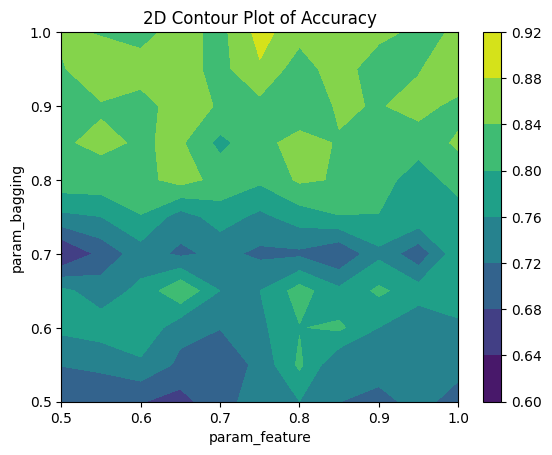

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of (K, D) values
K_grid, D_grid = np.meshgrid(randomness_params_space, randomness_params_bagging)

# Create a 2D array of A values corresponding to (K, D) pairs
A_grid = np.array(accuracy).reshape(K_grid.shape).T

# Create a contour plot
plt.contourf(K_grid, D_grid, A_grid, cmap='viridis')
plt.colorbar()
plt.xlabel('param_feature')
plt.ylabel('param_bagging')
plt.title('2D Contour Plot of Accuracy')

plt.show()

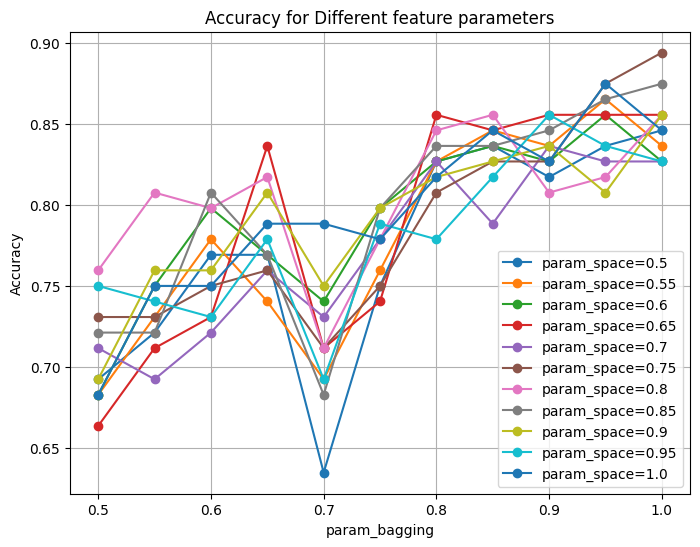

In [ ]:
# Create a plot to visualize accuracy for params_bagging under the same params_space
plt.figure(figsize=(8, 6))

for i, param_space_value in enumerate(randomness_params_space):
    plt.plot(randomness_params_bagging, accuracy[i, :], label=f"param_space={param_space_value}", marker='o')

plt.title("Accuracy for Different feature parameters")
plt.xlabel("param_bagging")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

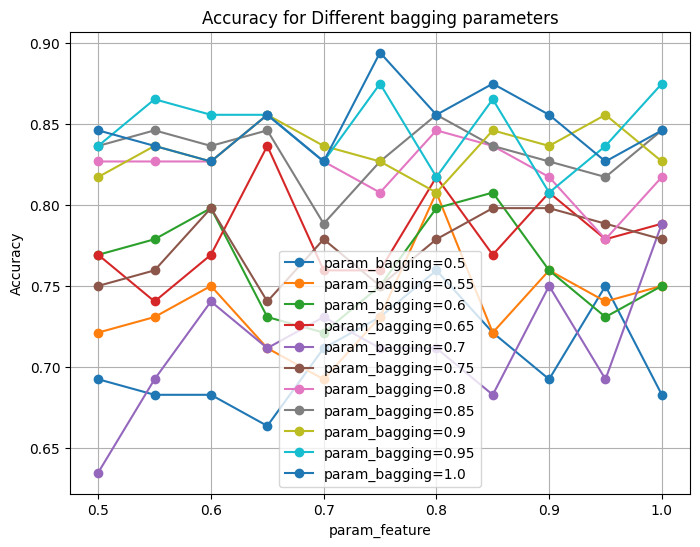

In [ ]:
# Create a plot to visualize accuracy for params_space under the same params_bagging
plt.figure(figsize=(8, 6))

for i, param_bagging_value in enumerate(randomness_params_bagging):
    plt.plot(randomness_params_space, accuracy[:, i], label=f"param_bagging={param_bagging_value}", marker='o')

plt.title("Accuracy for Different bagging parameters")
plt.xlabel("param_feature")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()